## Semantic Segmentaion using UNet

## The Oxford-IIIT Pet Dataset
 All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

Link to dataset: http://www.robots.ox.ac.uk/~vgg/data/pets/


In [1]:
import tensorflow
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# zip_path = "images.zip"

# from zipfile import ZipFile
# with ZipFile(zip_path,'r') as f:
#     f.extractall()

In [2]:
ALPHA=1.0
#Last time when we used a pre-trained model called mobile net, we used this parameter called 
#Alpha which goes from 0 to 1 and 1 means use the entire weights of the network.
IMAGE_HEIGHT= 224
IMAGE_WIDTH = 224

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

IMAGE_SIZE = 224 
TRAIN_CSV = 'train_od.csv'
VALIDATION_CSV = 'validation_od.csv'


In [32]:
import pandas as pd
data_csv = pd.read_csv('train_od.csv',header=None)

In [33]:
data_csv.shape

(3006, 9)

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

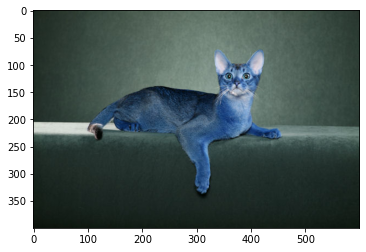

In [17]:
img = cv2.imread('./images/Abyssinian_1.jpg')
plt.imshow(np.array(img))

In [34]:
with open(TRAIN_CSV,"r") as f:
#     a = sum(1 for line in f)
#     print(a)
    data = csv.reader(f,delimiter=',')
    for index, row in enumerate(data):
        print(index)
        print(row)
        break
    

0
['/images/Abyssinian_1.jpg', '400', '600', '173', '72', '265', '158', 'abyssinian', '0']


In [ ]:
data = csv.reader(f,delimiter=',')

In [25]:
import numpy as np
import csv
import cv2

with open(TRAIN_CSV,"r") as f:
    y_train = np.zeros((sum(1 for line in f),HEIGHT_CELLS,WIDTH_CELLS))
    print(y_train.shape)
    X_train_path = []
    f.seek(0)
    
    data = csv.reader(f,delimiter=',')
    
    for index , row in enumerate(data):
        for i , r in enumerate(row[1:7]):
            row[i+1] = int(r)
        path , image_height,image_width,x0,y0,x1,y1,_,_ = row
        path ='.'+path
        path_mask = path.replace('.jpg','.png')
        msk_img = cv2.imread(path_mask)
        msk_img =(msk_img!=2) * 1.0
        msk_img = cv2.resize(msk_img,(28,28))
        msk_img = 1.0 *(msk_img[:,:,0]>0.2)
        y_train[index,:,:] = np.squeeze(msk_img)
        X_train_path.append(path)

(3006, 28, 28)


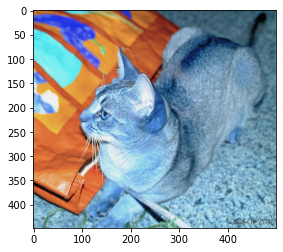

In [42]:
plt.imshow(cv2.imread(X_train_path[8]))

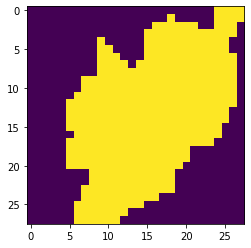

In [43]:
plt.imshow(y_train[8])

In [44]:
#Preprocess the images and convert them to numpy arrays which are compatible with mobilenet


In [48]:
X_train = X_train_path
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

for i , f in enumerate(X_train_path):
    img = Image.open(f)
    img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
    img = img.convert("RGB")
    X_train[i] = preprocess_input(np.array(img,dtype=np.float32))
    img.close()
    

In [71]:
X_train = np.array(X_train)
X_train.shape

(3006, 224, 224, 3)

In [49]:
#Perform the same on validation dataset
with open(VALIDATION_CSV,"r") as f:
    y_val = np.zeros((sum(1 for line in f),HEIGHT_CELLS,WIDTH_CELLS))
    print(y_val.shape)
    X_val_path = []
    f.seek(0)
    
    data = csv.reader(f,delimiter=',')
    
    for index , row in enumerate(data):
        for i , r in enumerate(row[1:7]):
            row[i+1] = int(r)
        path , image_height,image_width,x0,y0,x1,y1,_,_ = row
        path ='.'+path
        path_mask = path.replace('.jpg','.png')
        msk_img = cv2.imread(path_mask)
        msk_img =(msk_img!=2) * 1.0
        msk_img = cv2.resize(msk_img,(28,28))
        msk_img = 1.0 *(msk_img[:,:,0]>0.2)
        y_val[index,:,:] = np.squeeze(msk_img)
        X_val_path.append(path)

(680, 28, 28)


In [50]:
#Preprocess the images and convert them to numpy arrays which are compatible with mobilenet


In [51]:
X_val = X_val_path

In [52]:
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

for i , f in enumerate(X_val_path):
    img = Image.open(f)
    img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
    img = img.convert("RGB")
    X_val[i] = preprocess_input(np.array(img,dtype=np.float32))
    img.close()

In [72]:
X_val = np.array(X_val)
X_val.shape

(680, 224, 224, 3)

In [60]:
# from tensorflow.keras.applications.mobilenet import MobileNet
# sample_model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=True)

In [59]:
#sample_model.summary()

In [56]:
# from tensorflow.keras.applications.mobilenet import MobileNet
# sample_model2 = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=False)

In [ ]:
conv_pw_5_relu (ReLU)        (None, 28, 28, 256)  
conv_pw_11_relu (ReLU)       (None, 14, 14, 512)       0         
conv_pw_13_relu (ReLU)       (None, 7, 7, 1024)        0         


In [62]:
sample_model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [63]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, Conv2D , Reshape,UpSampling2D
from tensorflow.keras.models import Model

def create_model(training=True):
    model= MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=False,alpha=ALPHA,
                    weights='imagenet')
    
    for layer in model.layers:
        layer.trainable = training
        
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output
    
    x = Concatenate()([UpSampling2D()(block3),block2])
    x = Concatenate()([UpSampling2D()(x),block1])
    x = Conv2D(1,kernel_size=1,activation='sigmoid')(x)
    x =Reshape((HEIGHT_CELLS,WIDTH_CELLS))(x)
    
    return Model(inputs=model.input,outputs=x)


In [64]:
def dice_coefficient(y_true,y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true*y_pred)
    denominator = tensorflow.reduce_sum(y_true+y_pred)
    
    return numerator/(denominator+tensorflow.keras.backend.epsilon())

In [66]:
model = create_model(False)

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=[dice_coefficient])

In [68]:
#define callbacks
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5",monitor='val_loss',verbose=1,
                            save_best_only=True,save_weights_only=True)

stop = EarlyStopping(monitor='val_loss',patience=5)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=1e-6,verbose=1)

In [73]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=1,batch_size=32,verbose=1)

94/94 [==============================] - 87s 930ms/step - loss: 0.4673 - dice_coefficient: 0.6942 - val_loss: 0.2818 - val_dice_coefficient: 0.7972


In [82]:
import matplotlib.pyplot as plt
filename = './images/shiba_inu_100.jpg'
unscaled = cv2.imread(filename)

img = cv2.resize(unscaled,(IMAGE_WIDTH,IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(img,dtype=np.float32))


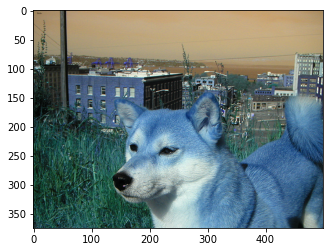

In [83]:
plt.imshow(unscaled)

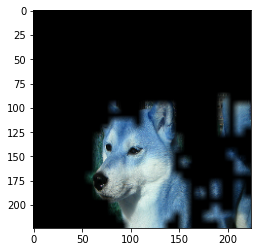

In [84]:
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0]>0.5),
                       (IMAGE_WIDTH,IMAGE_HEIGHT))

img2 = img
img2[:,:,0] = pred_mask*img[:,:,0]
img2[:,:,1] = pred_mask*img[:,:,1]
img2[:,:,2] = pred_mask*img[:,:,2]
output = img2
plt.imshow(output)